**Story 1 – “The Bank That Lost Millions”**
A private bank in Kolkata gives personal loans to thousands of customers.
Recently, many loans have gone bad (defaulted).

The bank suspects:

Some income records are missing

Some credit scores are wrong

Some customers look abnormally risky

The bank gives you a dataset and asks:

“Find the bad data, remove the noise, detect the risky customers, and build a clean dataset for risk modeling.”


Students must:

1. Detect missing values

2. Detect outliers in LoanAmount & CreditScore

3. Visualize using boxplot

4. Clean the dataset

5. Explain which customers look risky

In [3]:
import pandas as pd
df=pd.read_csv('/content/loan_risk.csv')
df.isna().sum()

,0
Income,0
CreditScore,0
LoanAmount,0
YearsEmployed,0
Age,0
DefaultRisk,0


In [4]:
Q1_L = df['LoanAmount'].quantile(0.25)
Q3_L = df['LoanAmount'].quantile(0.75)

IQR_L = Q3_L - Q1_L

lower_L = Q1_L - 1.5 * IQR_L
upper_L = Q3_L + 1.5 * IQR_L

loan_outliers = df[(df['LoanAmount'] < lower_L) |
                   (df['LoanAmount'] > upper_L)]

print("LoanAmount Lower Limit:", lower_L)
print("LoanAmount Upper Limit:", upper_L)

loan_outliers[['LoanAmount']]


LoanAmount Lower Limit: 2886.5898108101137
LoanAmount Upper Limit: 46341.953608547716


,LoanAmount
6,48434.995950
248,53000.552736
322,1068.831837
459,-9.953004
547,48394.464432


In [5]:
Q1_C = df['CreditScore'].quantile(0.25)
Q3_C = df['CreditScore'].quantile(0.75)

IQR_C = Q3_C - Q1_C

lower_C = Q1_C - 1.5 * IQR_C
upper_C = Q3_C + 1.5 * IQR_C

credit_outliers = df[(df['CreditScore'] < lower_C) |
                     (df['CreditScore'] > upper_C)]

print("CreditScore Lower Limit:", lower_C)
print("CreditScore Upper Limit:", upper_C)

credit_outliers[['CreditScore']]


CreditScore Lower Limit: 515.2925033677337
CreditScore Upper Limit: 847.4030055301718


,CreditScore
303,484.669086
371,495.396748
630,860.440099
755,505.656141
784,904.573469


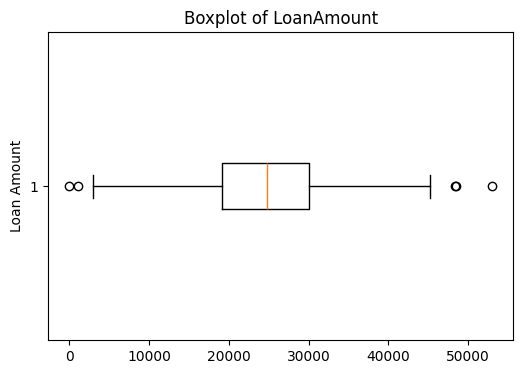

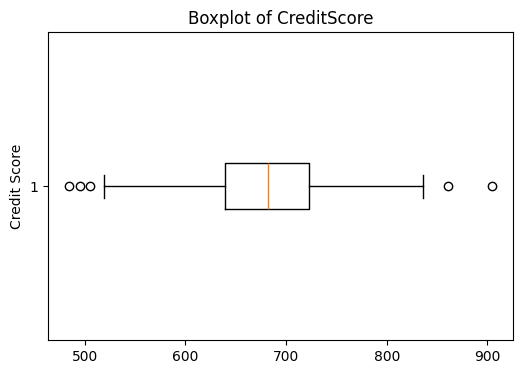

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.boxplot(df['LoanAmount'],vert=False)
plt.title("Boxplot of LoanAmount")
plt.ylabel("Loan Amount")
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df['CreditScore'],vert=False)
plt.title("Boxplot of CreditScore")
plt.ylabel("Credit Score")
plt.show()


In [9]:
df_clean = df[
    (df['LoanAmount'] >= lower_L) &
    (df['LoanAmount'] <= upper_L)
]


df_clean = df_clean[
    (df_clean['CreditScore'] >= lower_C) &
    (df_clean['CreditScore'] <= upper_C)
]

print("Original dataset size:", df.shape)
print("Cleaned dataset size:", df_clean.shape)



Original dataset size: (800, 6)
Cleaned dataset size: (790, 6)


## 🔍 How Risky Customers Are Determined

---

## 1️⃣ Customers with Low Credit Score

### 🔹 Why Are They Risky?
- Credit score reflects a customer’s **past repayment behavior**
- Very low scores indicate **poor credit history**
- Such customers have a **higher probability of default**

### 🔹 How Are They Identified?
`df[df['CreditScore'] < lower_C]`

### ✅ Conclusion
Customers whose **CreditScore falls below the IQR lower limit** are classified as  
**high-risk borrowers**.

---

## 2️⃣ Customers with Abnormally High Loan Amount

### 🔹 Why Are They Risky?
- High loan amounts increase the **repayment burden**
- Borrowing far above the normal range increases the **chance of default**

### 🔹 How Are They Identified?
`df[df['LoanAmount'] > upper_L]`

### ✅ Conclusion
Customers with **LoanAmount above the IQR upper limit** are considered risky due to  
**excessive borrowing**.

---

## 3️⃣ Customers Showing Multiple Risk Indicators  
*(Most Dangerous Category)*

### 🔹 Why Are They Extremely Risky?
A customer is considered **very high risk** when:
- **CreditScore is low**, AND
- **LoanAmount is high**

This indicates **poor repayment history combined with high financial exposure**.

### 🔹 How Are They Identified?
`high_risk = df[(df['CreditScore'] < lower_C) & (df['LoanAmount'] > upper_L)]`

### ✅ Conclusion
Customers having **both poor credit history and high loan exposure** represent the  
**highest default risk group**.

---

## 4️⃣ Borderline Risk Customers

### 🔹 Characteristics
- CreditScore **close to the lower limit**
- LoanAmount **close to the upper limit**

### 🔹 Risk Interpretation
- Not immediate defaulters
- May become risky under **adverse conditions**
- Require **manual verification or stricter monitoring**

### ✅ Conclusion
Borderline customers should be **carefully monitored** rather than immediately rejected.

---

## 📌 Exam Conclusion Line

**Risky customers are identified using IQR-based outlier detection on CreditScore and LoanAmount, with the highest risk observed when both indicators are unfavorable.**
